In [17]:
import uptide
import uptide.tidal_netcdf
import os.path
import datetime
import numpy as np
import utm
import sys
import matplotlib.pyplot as plt
import csv
import pandas as pd
import fes

In [18]:
ls

fes_slev.py  rvk_example.txt  Untitled3.ipynb  Untitled6.ipynb  Untitled.ipynb
fes_uv.py    Untitled1.ipynb  Untitled4.ipynb  Untitled7.ipynb
mytide.py    Untitled2.ipynb  Untitled5.ipynb  Untitled8.ipynb


In [19]:
rvk = pd.read_csv('rvk_example.txt', sep = '\t', names = ['ssh'], index_col = 0)

In [20]:
rvk.index = pd.to_datetime(rvk.index)

In [21]:
rvk['ssh_corrected']=rvk['ssh']-02.442

/home/angel/anaconda3/envs/fes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


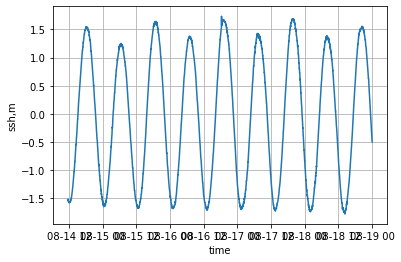

In [6]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh']-2.442)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too


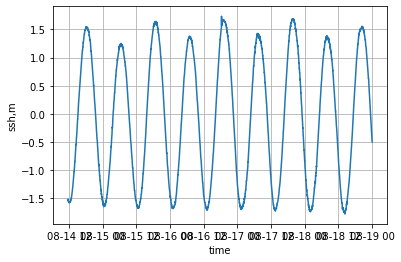

In [22]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh_corrected'])
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

In [23]:
def extract_series(tnci, ll, trange):
    etas = []
    for t in trange:
        tnci.set_time(t)
        eta = tnci.get_val(ll)
        etas.append(eta)
    return etas

In [24]:
tide = uptide.Tides(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

In [25]:
np.size(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

33

In [26]:
#tide.set_initial_time(datetime.datetime(2005,3,1,16,0))
tide.set_initial_time(datetime.datetime(2019,8,14,0,0))
tnci = uptide.FES2014TidalInterpolator('/home/angel/tools/fes-2.9.1-Source/data/fes2014/ocean_tide.ini')

In [27]:
tnci.set_initial_time(datetime.datetime(2019,8,14,0,0))

In [ ]:
tnci.

In [28]:
lat = 64.15
lon = 338.06667

In [36]:
dt0 = datetime.datetime(2019,8,14,0,0,0)
trange = np.arange(0., 24.*5., 1/60)*3600.
series = {}

#for dt
#tnci.set_time(9*3600)


In [37]:
series['FES2014'] = extract_series(tnci, (lat, lon), trange)

In [38]:
ee = extract_series(tnci, (lat, lon), trange)

In [39]:
np.size(ee)

7200

In [40]:
24*60*5

7200

In [41]:
arr = dt0 + pd.to_timedelta(np.arange(7200), 'm')
#arr = this is making this in minutes 5 days 24hrs/day * 60 min/hr 

In [42]:
arr

DatetimeIndex(['2019-08-14 00:00:00', '2019-08-14 00:01:00',
               '2019-08-14 00:02:00', '2019-08-14 00:03:00',
               '2019-08-14 00:04:00', '2019-08-14 00:05:00',
               '2019-08-14 00:06:00', '2019-08-14 00:07:00',
               '2019-08-14 00:08:00', '2019-08-14 00:09:00',
               ...
               '2019-08-18 23:50:00', '2019-08-18 23:51:00',
               '2019-08-18 23:52:00', '2019-08-18 23:53:00',
               '2019-08-18 23:54:00', '2019-08-18 23:55:00',
               '2019-08-18 23:56:00', '2019-08-18 23:57:00',
               '2019-08-18 23:58:00', '2019-08-18 23:59:00'],
              dtype='datetime64[ns]', length=7200, freq=None)

In [43]:
df = pd.DataFrame({'dates_fes':arr,'ssh_fes':ee}).set_index('dates_fes')

In [44]:
eta = tnci.get_val((lat, lon))

In [45]:
cc = tnci.fh((lat, lon))

TypeError: 'fes.Handler' object is not callable

In [48]:
help(tnci.fh)

Help on Handler object:

class Handler(builtins.object)
 |  FES handler
 |  
 |  :param tide: Computation mode. If tide is equals to "tide", the handler
 |      computes the tide, if modeshe computes the radial tide.
 |  :type tide: str
 |  :param mode: One of 'memory', 'io' which request loading grids into
 |      memory or direct access from NetCDF grids.
 |  :type mode: str
 |  :param path: Path to the configuration file.
 |  :type path: str
 |  
 |  Methods defined here:
 |  
 |  __reduce__ = __reduce_cython__(...)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |  
 |  min_number(...)
 |      Gets the minimum number of points used during the interpolation
 |      
 |      :return: TODO
 |      :rtype: int
 |  
 |  scalar(...)
 |      Tidal computation for scalar values
 |      
 |      :param lat: Latitude in degrees (positive north) for the position
 |          at which tide is computed.
 |      :type lat: float
 |      :param lon: Longitude in degrees for the position at which

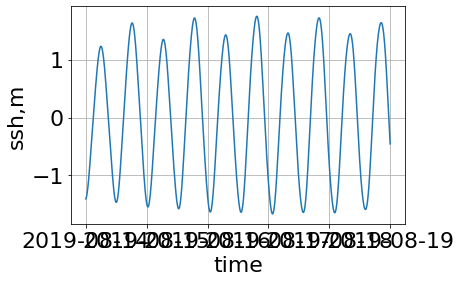

In [169]:
plt.plot(arr,ee)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)

Text(0.5, 1.0, 'RVK, FES vs OBS: August 2019')

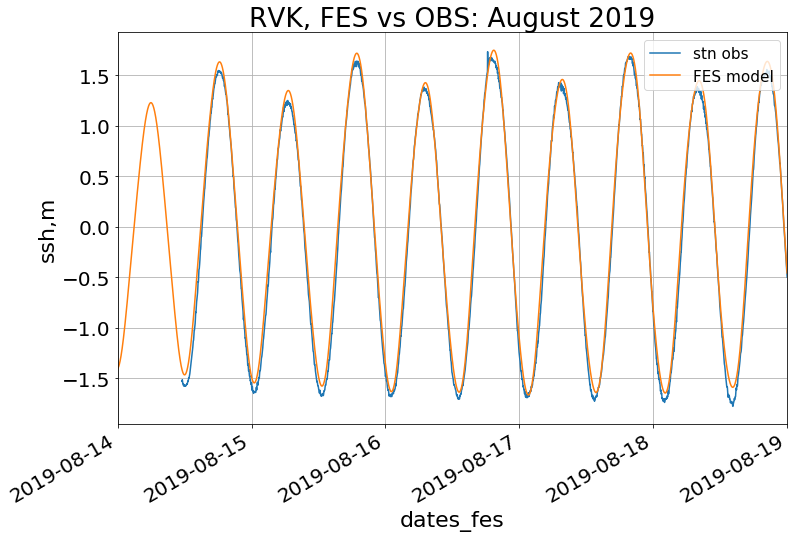

In [176]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
rvk.loc['2019-08-14 00:00':'2019-08-19 00:00:00','ssh_corrected'].plot(ax=ax, label='stn obs')
df.loc['2019-08-14 00:00':'2019-08-19 00:00:00','ssh_fes'].plot(ax=ax, label='FES model')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('RVK, FES vs OBS: August 2019')

In [83]:
eta

1.3839459172343624